In [133]:
import pandas as pd
import pandas as pd
import geopandas as gpd  # Import geopandas
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import numpy as np

df = pd.read_csv("education_indicators.csv")

In [134]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 16 columns):
 #   Column                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                               --------------  ----- 
 0   Time                                                                                                                 1696 non-null   object
 1   Time Code                                                                                                            1694 non-null   object
 2   Country Name                                                                                                         1694 non-null   object
 3   Country Code                                                                                                         1694 non-null   object
 4   Total net enrolmen

In [135]:
# Example: Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [136]:
df.duplicated().sum()
# Remove duplicates
df = df.drop_duplicates()

In [137]:
# Standardize country names
df["country"] = df["Country Name"].str.strip().str.title()

In [138]:
# Load GeoJSON
url = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"
geo_data = gpd.read_file(url)

In [139]:
# List of African countries (simplified, adjust as needed)
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde",
    "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo", "Democratic Republic of the Congo",
    "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia",
    "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya",
    "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia",
    "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone",
    "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda",
    "Zambia", "Zimbabwe"
]

# Filter for African countries
geo_data = geo_data[geo_data["name"].isin(african_countries)]

In [140]:
# Merge datasets
merged_data = geo_data.merge(df, left_on="name", right_on="country", how="left")

In [141]:
# Save cleaned dataset
merged_data.to_csv("clean_education_indicators.csv", index=False)
print("Cleaned dataset saved as 'clean_education_indicators.csv'")

Cleaned dataset saved as 'clean_education_indicators.csv'


In [142]:
# List column names
print("Original column names:", merged_data.columns.tolist())

Original column names: ['id', 'name', 'geometry', 'Time', 'Time Code', 'Country Name', 'Country Code', 'Total net enrolment rate, primary, male (%) [UIS.NERT.1.M]', 'Total net enrolment rate, primary, gender parity index (GPI) [UIS.NERT.1.GPI]', 'Total net enrolment rate, primary, female (%) [UIS.NERT.1.F]', 'Total net enrolment rate, primary, both sexes (%) [UIS.NERT.1]', 'Total net enrolment rate, lower secondary, male (%) [UIS.NERT.2.M]', 'Total net enrolment rate, lower secondary, gender parity index (GPI) [UIS.NERT.2.GPI]', 'Total net enrolment rate, lower secondary, female (%) [UIS.NERT.2.F]', 'Total net enrolment rate, lower secondary, both sexes (%) [UIS.NERT.2]', 'Government expenditure on primary education as % of GDP (%) [UIS.XGDP.1.FSGOV]', 'Government expenditure on secondary education as % of GDP (%) [UIS.XGDP.23.FSGOV]', 'Initial government funding per lower secondary student as a percentage of GDP per capita [UIS.XUNIT.GDPCAP.2.FSGOV]', 'GDP per capita, PPP (current int

In [143]:
rename_dict = {
    'Time': 'Year', 
    'Country Name': 'country',
    'Total net enrolment rate, primary, male (%) [UIS.NERT.1.M]' : 'Primary Male enrollment %', 
    'Total net enrolment rate, primary, gender parity index (GPI) [UIS.NERT.1.GPI]': 'Primary Gender Parity index',
    'Total net enrolment rate, primary, female (%) [UIS.NERT.1.F]': 'Primary female enrollment %',
    'Total net enrolment rate, primary, both sexes (%) [UIS.NERT.1]':'Total Primary enrollment %',
    'Total net enrolment rate, lower secondary, male (%) [UIS.NERT.2.M]': 'Total Secondary male enrollment %',
    'Total net enrolment rate, lower secondary, gender parity index (GPI) [UIS.NERT.2.GPI]': 'Lower secondary Gender Parity index',
    'Total net enrolment rate, lower secondary, female (%) [UIS.NERT.2.F]': 'Total secondary female enrollment %',
    'Total net enrolment rate, lower secondary, both sexes (%) [UIS.NERT.2]':'Total Secondary enrollment %', 
    'Government expenditure on primary education as % of GDP (%) [UIS.XGDP.1.FSGOV]': 'Government primary education expenditure %ge of GDP', 
    'Government expenditure on secondary education as % of GDP (%) [UIS.XGDP.23.FSGOV]': 'Government Secondary education expenditure %ge of GDP',
    'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]': 'GDP per capita'
}
merged_data = merged_data.rename(columns=rename_dict)
print("Renamed column names:", merged_data.columns.tolist())

Renamed column names: ['id', 'name', 'geometry', 'Year', 'Time Code', 'country', 'Country Code', 'Primary Male enrollment %', 'Primary Gender Parity index', 'Primary female enrollment %', 'Total Primary enrollment %', 'Total Secondary male enrollment %', 'Lower secondary Gender Parity index', 'Total secondary female enrollment %', 'Total Secondary enrollment %', 'Government primary education expenditure %ge of GDP', 'Government Secondary education expenditure %ge of GDP', 'Initial government funding per lower secondary student as a percentage of GDP per capita [UIS.XUNIT.GDPCAP.2.FSGOV]', 'GDP per capita', 'country']


In [144]:
# Drop one 'country' column, keeping the last occurrence
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated(keep='last')]

# Verify merged_data columns after removing duplicate
print("Merged data columns after removing duplicate 'country':", merged_data.columns.tolist())

Merged data columns after removing duplicate 'country': ['id', 'name', 'geometry', 'Year', 'Time Code', 'Country Code', 'Primary Male enrollment %', 'Primary Gender Parity index', 'Primary female enrollment %', 'Total Primary enrollment %', 'Total Secondary male enrollment %', 'Lower secondary Gender Parity index', 'Total secondary female enrollment %', 'Total Secondary enrollment %', 'Government primary education expenditure %ge of GDP', 'Government Secondary education expenditure %ge of GDP', 'Initial government funding per lower secondary student as a percentage of GDP per capita [UIS.XUNIT.GDPCAP.2.FSGOV]', 'GDP per capita', 'country']


In [145]:
import plotly.express as px
import numpy as np

key_vars = [
    'Primary Male enrollment %', 'Primary female enrollment %',
    'Total Secondary male enrollment %', 'Total secondary female enrollment %',
    'Government primary education expenditure %ge of GDP',
    'Government Secondary education expenditure %ge of GDP', 'GDP per capita'
]
merged_data[key_vars] = merged_data[key_vars].apply(pd.to_numeric, errors='coerce')
merged_data[key_vars] = merged_data[key_vars].replace('..', np.nan)                                                  
print(merged_data[key_vars].describe())



for var in key_vars[:3]:  # Limit to 3 for visualization brevity
    fig = px.histogram(merged_data, x=var, title=f"Distribution of {var}")
    fig.show()

       Primary Male enrollment %  Primary female enrollment %  \
count                 158.000000                   158.000000   
mean                   82.654523                    79.562530   
std                    15.416161                    17.026608   
min                    42.428310                    32.739500   
25%                    71.045990                    63.895715   
50%                    88.704960                    85.100010   
75%                    95.671858                    94.234620   
max                   100.000000                   100.000000   

       Total Secondary male enrollment %  Total secondary female enrollment %  \
count                          76.000000                            76.000000   
mean                           66.057297                            59.360439   
std                            16.261996                            19.782224   
min                            24.002810                            17.542500   
25%      

In [146]:
# 3. Correlation Analysis
print("\n=== Correlation Matrix ===")
corr_matrix =merged_data[key_vars].corr()
print(corr_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Indicators')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()


=== Correlation Matrix ===
                                                    Primary Male enrollment %  \
Primary Male enrollment %                                            1.000000   
Primary female enrollment %                                          0.922965   
Total Secondary male enrollment %                                    0.587934   
Total secondary female enrollment %                                  0.582753   
Government primary education expenditure %ge of...                   0.230054   
Government Secondary education expenditure %ge ...                   0.394698   
GDP per capita                                                      -0.154792   

                                                    Primary female enrollment %  \
Primary Male enrollment %                                              0.922965   
Primary female enrollment %                                            1.000000   
Total Secondary male enrollment %                                      0.6

# Analysis of the Correlation Matrix
The correlation matrix shows Pearson correlation coefficients (ranging from -1 to 1) between pairs of indicators. Here’s a breakdown of key observations:

# Strong Positive Correlations:
Primary Male Enrollment % vs. Primary Female Enrollment % (0.923): Very strong positive correlation, suggesting that countries with high primary male enrollment also have high primary female enrollment, indicating similar access to primary education across genders.
Total Secondary Male Enrollment % vs. Total Secondary Female Enrollment % (0.921): Similarly, secondary enrollment rates for males and females are highly correlated, suggesting gender parity in secondary education access in many regions.
Primary Female Enrollment % vs. Total Secondary Female Enrollment % (0.748): Strong correlation, indicating that regions with high primary female enrollment tend to have high secondary female enrollment, suggesting continuity in female education.
# Moderate Positive Correlations:
Total Secondary Male Enrollment % vs. Government Secondary Education Expenditure % of GDP (0.562): Moderate correlation, suggesting that higher government spending on secondary education is associated with higher male secondary enrollment.
Government Primary Education Expenditure % of GDP vs. Government Secondary Education Expenditure % of GDP (0.503): Moderate correlation, indicating that countries investing more in primary education also tend to invest in secondary education.
GDP per Capita vs. Total Secondary Male/Female Enrollment % (0.491 and 0.432): Moderate positive correlation, suggesting wealthier countries (higher GDP per capita) tend to have higher secondary enrollment rates.
# Weak or Negative Correlations:
GDP per Capita vs. Primary Male/Female Enrollment % (-0.155 and -0.028): Weak negative or near-zero correlations, suggesting that GDP per capita has little to no association with primary enrollment rates. This could indicate that primary education is near-universal in many countries, regardless of wealth.
Government Primary Education Expenditure % of GDP vs. Most Indicators: Weak correlations (e.g., 0.231 with Primary Male Enrollment %, 0.156 with Secondary Male Enrollment %), suggesting that primary education spending as a percentage of GDP has limited direct impact on enrollment rates, possibly due to other factors like infrastructure or policy.
GDP per Capita vs. Government Primary Education Expenditure % of GDP (-0.109): Weak negative correlation, possibly indicating that wealthier countries spend a smaller percentage of GDP on primary education, perhaps due to larger GDPs or different funding priorities.
# Key Insights:
Gender parity is strong in both primary and secondary enrollment, as evidenced by high correlations between male and female metrics.
Secondary enrollment is more strongly tied to GDP per capita and government secondary education spending than primary enrollment, possibly because secondary education is less universal and more resource-dependent.
The weak correlation between government expenditure (% of GDP) and enrollment rates suggests that spending alone doesn’t guarantee higher enrollment; other factors (e.g., access, infrastructure, cultural factors) may play a role.


=== Spearman Correlation Matrix ===
                                                    Primary Male enrollment %  \
Primary Male enrollment %                                            1.000000   
Primary female enrollment %                                          0.889933   
Total Secondary male enrollment %                                    0.590867   
Total secondary female enrollment %                                  0.584223   
Government primary education expenditure %ge of...                   0.117431   
Government Secondary education expenditure %ge ...                   0.360539   
GDP per capita                                                       0.141091   

                                                    Primary female enrollment %  \
Primary Male enrollment %                                              0.889933   
Primary female enrollment %                                            1.000000   
Total Secondary male enrollment %                                

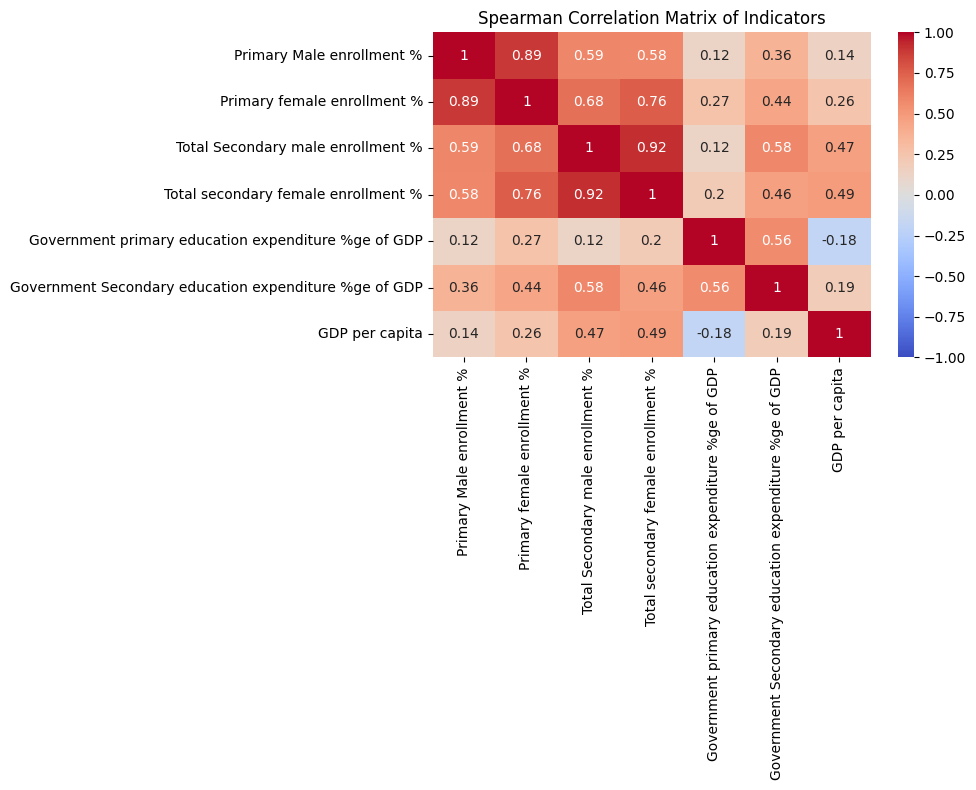

In [147]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster, TimestampedGeoJson
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.cluster import KMeans

# Load the GeoJSON dataset
#merged_data = gpd.read_file('merged_data.geojson')

# Ensure valid geometries
#if merged_data.geometry.is_empty.any() or merged_data.geometry.isna().any():
    #print("Warning: Empty or NaN geometries detected. Dropping invalid rows.")
    #merged_data = merged_data[merged_data.geometry.is_valid & ~merged_data.geometry.is_empty]

# Define key variables
key_vars = [
    'Primary Male enrollment %',
    'Primary female enrollment %',
    'Total Secondary male enrollment %',
    'Total secondary female enrollment %',
    'Government primary education expenditure %ge of GDP',
    'Government Secondary education expenditure %ge of GDP',
    'GDP per capita'
]

# 1. Correlation Analysis (using Spearman to avoid pingouin dependency)
print("\n=== Spearman Correlation Matrix ===")
corr_matrix = merged_data[key_vars].corr(method='spearman')
print(corr_matrix)

# Plot static correlation heatmap (from your code)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Spearman Correlation Matrix of Indicators')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Interactive Plotly Heatmap
fig = px.imshow(
    corr_matrix,
    x=key_vars,
    y=key_vars,
    color_continuous_scale='RdBu_r',
    zmin=-1,
    zmax=1,
    title='Interactive Spearman Correlation Matrix'
)
fig.update_layout(width=800, height=600)
fig.write_html('correlation_heatmap_interactive.html')

# Clean data for scatter
merged_clean = merged_data.dropna(subset=['Government Secondary education expenditure %ge of GDP'])

fig = px.scatter(
    merged_clean,
    x='GDP per capita',
    y='Total Secondary male enrollment %',
    color='Primary Male enrollment %',
    size='Government Secondary education expenditure %ge of GDP',
    hover_data=key_vars,
    title='Interactive Scatter: GDP per Capita vs Secondary Male Enrollment',
    color_continuous_scale='Viridis'
)
fig.update_layout(width=800, height=600)
fig.write_html('scatter_plot_interactive.html')




In [156]:
merged_clean = merged_data.dropna(
    subset=['Government Secondary education expenditure %ge of GDP']
)

fig = px.scatter(
    merged_clean,
    x='GDP per capita',
    y='Total Secondary male enrollment %',
    color='Primary Male enrollment %',
    size='Government Secondary education expenditure %ge of GDP',
    hover_data=key_vars,
    title='Interactive Scatter: GDP per Capita vs Secondary Male Enrollment',
    color_continuous_scale='Viridis'
)
fig.update_layout(width=800, height=600)
fig.write_html('scatter_plot_interactive.html')


In [157]:
# 3. Box Plots for Outlier Detection
plt.figure(figsize=(15, 8))
for i, var in enumerate(key_vars, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=merged_data[var])
    plt.title(var)
    plt.ylabel('')
plt.tight_layout()
plt.savefig('box_plots.png')
plt.close()

In [158]:
# 4. K-means Clustering
X = merged_data[key_vars].dropna()
X_scaled = (X - X.mean()) / X.std()
kmeans = KMeans(n_clusters=3, random_state=42)
X['cluster'] = kmeans.fit_predict(X_scaled)
merged_data.loc[X.index, 'cluster'] = X['cluster'].astype(str)

In [163]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from matplotlib import cm

# 1. Compute centroids if geometries are polygons
if merged_data.geometry.type.iloc[0] in ['Polygon', 'MultiPolygon']:
    merged_data = merged_data.to_crs(epsg=3395)
    merged_data['geometry'] = merged_data.geometry.centroid
    merged_data = merged_data.to_crs(epsg=4326)

# 2. Normalize values
def normalize(series):
    rng = series.max() - series.min()
    return (series - series.min()) / (rng if rng != 0 else 1)

merged_data['color_norm'] = normalize(merged_data['GDP per capita'])
merged_data['size_norm'] = normalize(merged_data['Total Secondary male enrollment %'])

# 3. Initialize map
map_center = [merged_data.geometry.y.mean(), merged_data.geometry.x.mean()]
m = folium.Map(location=map_center, zoom_start=3, tiles='CartoDB positron')

# 4. Add circle markers: color = GDP, size = enrollment
for idx, row in merged_data.iterrows():
    color_value = row['color_norm']
    color = cm.Reds(color_value)  # Use 'Reds' for GDP shading
    color_hex = '#%02x%02x%02x' % (int(color[0]*255), int(color[1]*255), int(color[2]*255))

    popup_content = f"""
        <strong>Cluster:</strong> {row.get('cluster', 'N/A')}<br>
        <strong>GDP per capita:</strong> {row.get('GDP per capita', 0):,.2f}<br>
        <strong>Primary Male Enrollment:</strong> {row.get('Primary Male enrollment %', 0):.2f}%<br>
        <strong>Primary Female Enrollment:</strong> {row.get('Primary female enrollment %', 0):.2f}%<br>
        <strong>Secondary Male Enrollment:</strong> {row.get('Total Secondary male enrollment %', 0):.2f}%<br>
        <strong>Secondary Female Enrollment:</strong> {row.get('Total secondary female enrollment %', 0):.2f}%<br>
        <strong>Primary Edu Exp (% GDP):</strong> {row.get('Government primary education expenditure %ge of GDP', 0):.2f}%<br>
        <strong>Secondary Edu Exp (% GDP):</strong> {row.get('Government Secondary education expenditure %ge of GDP', 0):.2f}%
    """

    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5 + row['size_norm'] * 15,  # Bubble size reflects enrollment
        color=color_hex,
        fill=True,
        fill_color=color_hex,
        fill_opacity=0.8,
        popup=folium.Popup(popup_content, max_width=300)
    ).add_to(m)

# 5. Add legend
legend_html = '''
<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; padding: 10px;
            background-color: white; border: 1px solid black; font-size:14px;">
    <p><strong>Bubble Map Legend</strong></p>
    <p><b>Color</b>: GDP per capita (light = low, dark = high)</p>
    <p><b>Bubble Size</b>: Total Secondary Male Enrollment %</p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# 6. Save map
m.save('interactive_bubble_map_gdp_color.html')

print("Map generated: 'interactive_bubble_map_gdp_color.html'")


Map generated: 'interactive_bubble_map_gdp_color.html'
